In [1]:
import warnings


warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

c:\Users\VEDANT\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv("updated_dataset.csv")


In [4]:
X = data.drop(columns=['price'])  
y = data['price']  

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
dt_regressor = DecisionTreeRegressor(random_state=42)


dt_regressor.fit(X_train, y_train)


y_pred = dt_regressor.predict(X_test)




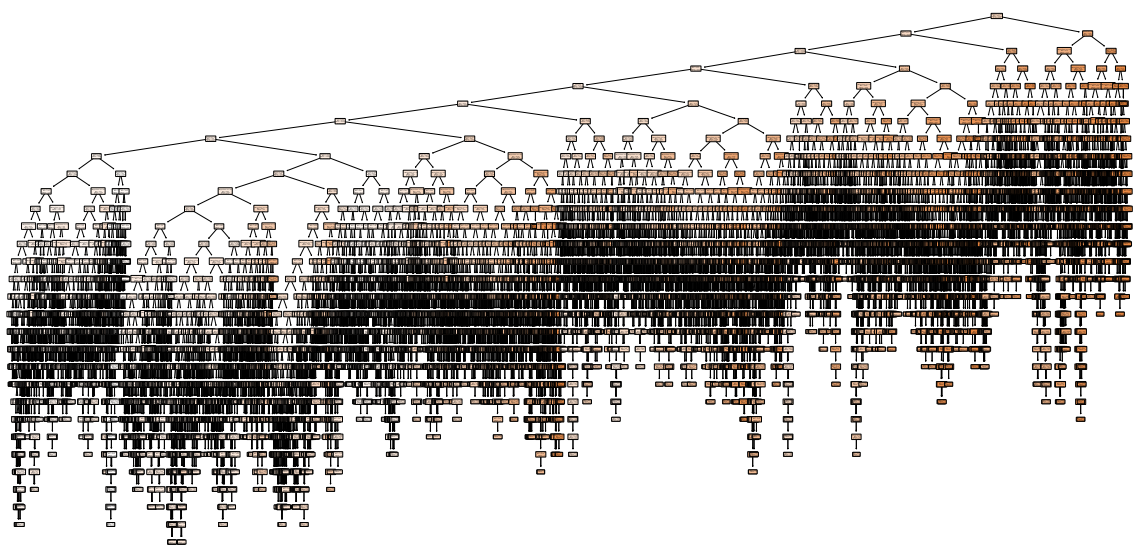

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming dt_regressor is already fitted
plt.figure(figsize=(20, 10))  # Adjust the size of the plot
plot_tree(dt_regressor, filled=True, feature_names=X_train.columns, rounded=True)
plt.show()


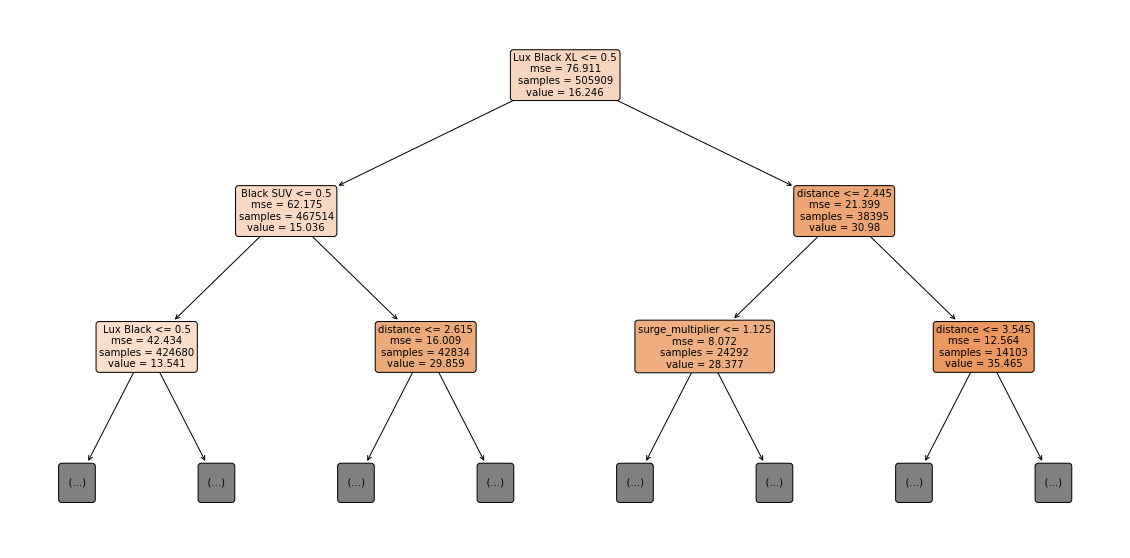

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plotting the first 3 levels of the tree and storing the plot in a variable
fig, ax = plt.subplots(figsize=(20, 10))  # Adjust the size of the plot
tree_plot = plot_tree(dt_regressor, max_depth=2, filled=True, feature_names=X_train.columns, rounded=True, ax=ax)

# Display the plot
plt.show()


In [7]:
# Compute R-squared (R^2) score
from sklearn.metrics import r2_score,mean_absolute_percentage_error
r_squared = r2_score(y_test, y_pred)
print(f'R-squared (R^2) Score: {r_squared}')
mape = mean_absolute_percentage_error(y_test,y_pred)
print(f'Mean Abs Percent Error:{mape}');

R-squared (R^2) Score: 0.9648416192037758
Mean Abs Percent Error:0.08266659129607166


In [10]:
from sklearn.metrics import *
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

1.101196147780439
2.703001076288161


Checking for Overfit

In [10]:
y_train_pred =dt_regressor.predict(X_train)
trainr2 = r2_score(y_train_pred,y_train)
trainr2

0.9652143491227209

Train R2 = 0.9664

Test R2 = 0.9653

Hence the model is correctly fit

## PREDICTION

In [36]:
## Input
dist = float(input("Enter The Distance"))
sur = float(input("Enter Surge Multiplier"))
str = "0:Black	1:Black 2:SUV	3:Lux	4:Lux Black	5:Lux Black XL	6:Lyft	7:Lyft XL	8:Shared	9:UberPool	10:UberX	11:UberXL	12:WAV"
print("Enter Cab Name:","\n",str)
name = int(input(""))
str2 = int(input("Enter 1 for Uber and 0 for Lyft"))
list1 = [0 for i in range(12)]
list1[name] = 1
list2 =[0,0]
list2[str2] = 1
input1 = [dist,sur]
input1.extend(list1)
input1.extend(list2)
out = dt_regressor.predict([input1])
out

Enter Cab Name: 
 0:Black	1:Black 2:SUV	3:Lux	4:Lux Black	5:Lux Black XL	6:Lyft	7:Lyft XL	8:Shared	9:UberPool	10:UberX	11:UberXL	12:WAV


array([12.])